In [1]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
import matplotlib
import copy
import astropy.io.fits as _fits

In [2]:
import transformations

In [3]:
abs_path = '/Users/konstantinleyde/Documents/neural_networks/galaxy_diffusion/example_data/'
filename = abs_path + ['shalo_091-0_v0_photo.fits', 'shalo_091-70292_v3_photo.fits', 'shalo_091-70295_v3_photo.fits'][0]
image_file = _fits.util.data.get_pkg_data_filename(filename)


In [4]:
image_data = _fits.getdata(image_file, ext = 0)

In [5]:
_fits.getheader(image_file)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5000                                                  
NAXIS2  =                 5000                                                  
EXTEND  =                    T                                                  
EXTNAME = 'CFHT_MEGACAM.U'     / extension name                                 
ORIGIN  = 'SKIRT 9 Simulation' / Image origin                                   
SIMTAG  = 'TNG50-1 '           / Simulation name                                
SNAPNUM =                   91 / Simulation snapshot                            
SUBHALO =                    0 / Subhalo ID                                     
CAMERA  = 'v0      '           / Camera ID                                      
INCL    =                109

In [6]:
type(image_data)

numpy.ndarray

In [7]:
def invert(data):
    return -data


def invert_and_normalize(data, min_val = 0, max_val = 1):
    
    inverted_data = invert(data)
    
    maximum_inverted_data = np.max(inverted_data)
    
    inverted_normalized_data = inverted_data - maximum_inverted_data

    # normalize data between 0 and 1
    return normalize_data(inverted_normalized_data)
    

def normalize_data(data):
    
    "Normalize data between 0 and 1 (multiplicatively). "
    
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

def crop_to_square_image(data, new_size, pos_x_init = 0, pos_y_int = 0):
    
    """
    Crop the array to a square array of size (new_size, new_size)
    """
    
    shape_data = data.shape
    
    if(new_size > data.shape[0] or new_size > data.shape[1]):
        raise "Error, image smaller than requested size. "
        
    return data[pos_x_init:pos_x_init+new_size, pos_y_int:pos_y_int+new_size]
    

In [8]:
hist_kwargs = {'bins' : 'auto', 'histtype' : 'step', 'density' : True}

def histogram(data, **hist_kwargs):
    
    data_hist = data.flatten()
    
    plt.hist(data_hist, **hist_kwargs)
    
def plot_image(image_data, vmin = None, vmax = None):
    
    if(vmin == None): vmin = np.min(image_data)
    if(vmax == None): vmax = np.max(image_data)
    
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    plt.imshow(image_data, cmap='jet', vmin = vmin, vmax = vmax)
    plt.colorbar()

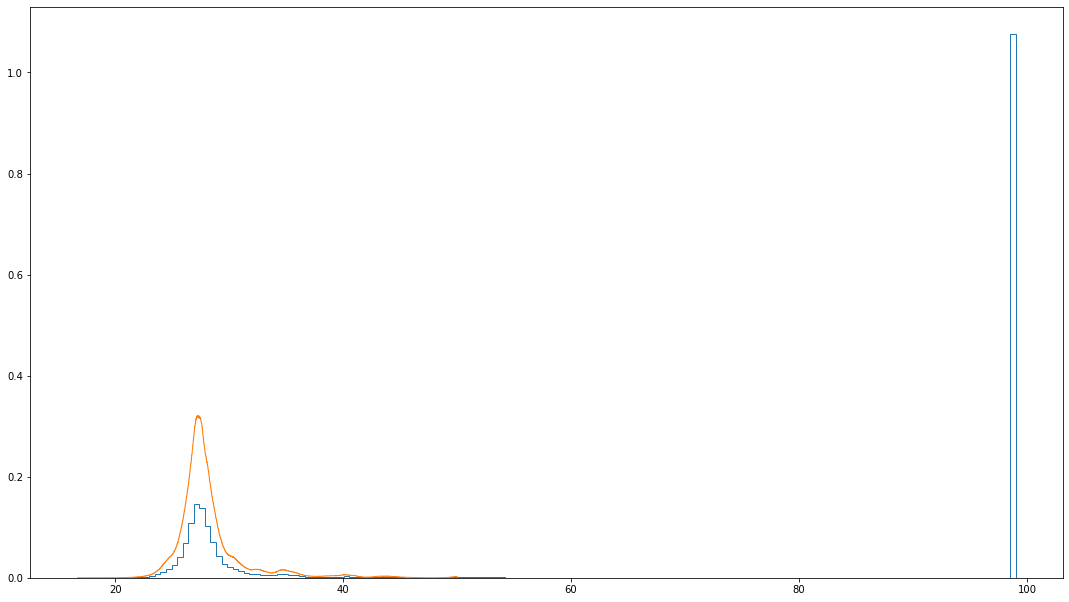

In [9]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
histogram(image_data, **hist_kwargs)
histogram(image_data[image_data < 50], **hist_kwargs)
# plt.ylim(0,0.5)

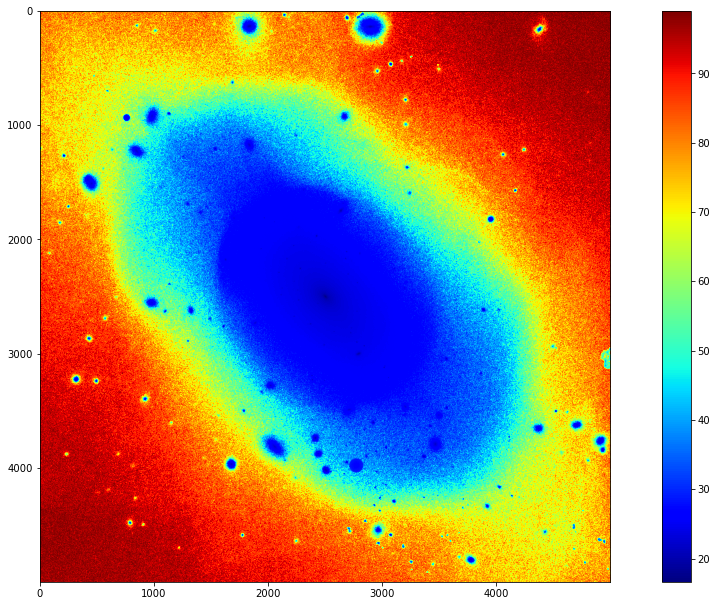

In [10]:
plot_image(image_data)

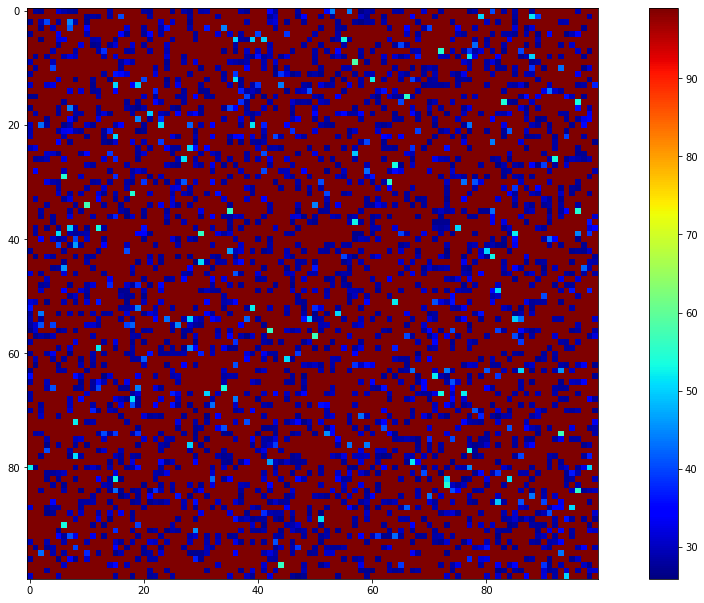

In [11]:
plot_image(crop_to_square_image(image_data, 100, pos_x_init=100, pos_y_int=100))

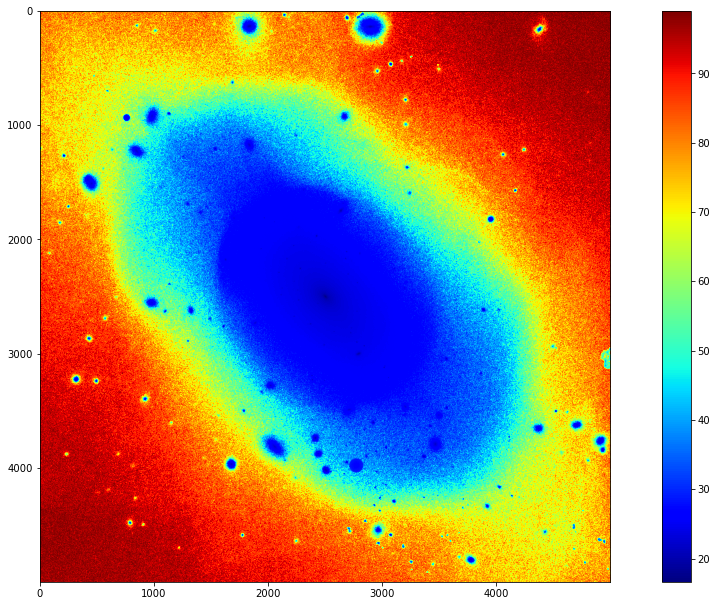

In [12]:
plot_image(image_data)

In [13]:
from scipy.ndimage import zoom

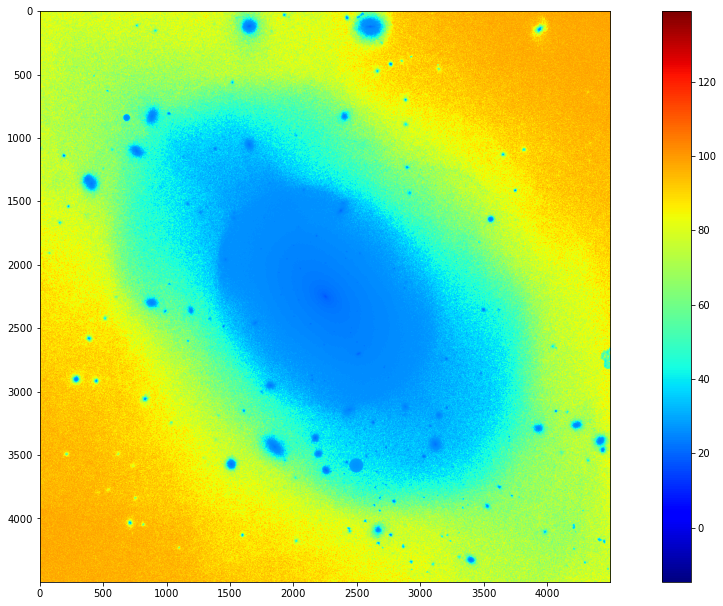

In [14]:
from astropy.nddata import block_reduce, block_replicate
    
image_data = _fits.getdata(image_file, ext = 0)

# Open the image file
image_smaller = zoom(image_data, 0.9)

plot_image(image_smaller)

In [15]:
zoom(image_data, 1.3)

array([[ 27.82555 ,  21.58333 ,  77.28928 , ...,  99.      ,  99.      ,
         99.      ],
       [ 81.98221 ,  80.33909 ,  92.36452 , ...,  98.99998 ,  99.00001 ,
         99.      ],
       [105.618164, 106.91785 , 107.88185 , ...,  99.000114,  98.99998 ,
         99.      ],
       ...,
       [ 99.67027 ,  99.15947 ,  98.94146 , ...,  57.02386 ,  58.916527,
         61.4143  ],
       [ 98.85917 ,  98.96859 ,  99.00234 , ...,  17.348682,  58.046757,
        104.63028 ],
       [ 99.      ,  99.      ,  99.      , ...,  63.071224, 104.288925,
         99.      ]], dtype=float32)

In [16]:
pixel_conversion = transformations.pixel_conversion

In [17]:
transformations.summarize_cosmology()

Hubble constant (H0): 67.74 km / (Mpc s)
Matter density parameter (Omega_m): 0.3075
Dark energy density parameter (Omega_lambda): 0.6910098315260953


# Check the function against another computation

In [18]:
transformations.get_down_scale_factor(z = 0.2, experiment='HSC')

5.788855188387771

# Compute an example image that is downsampled

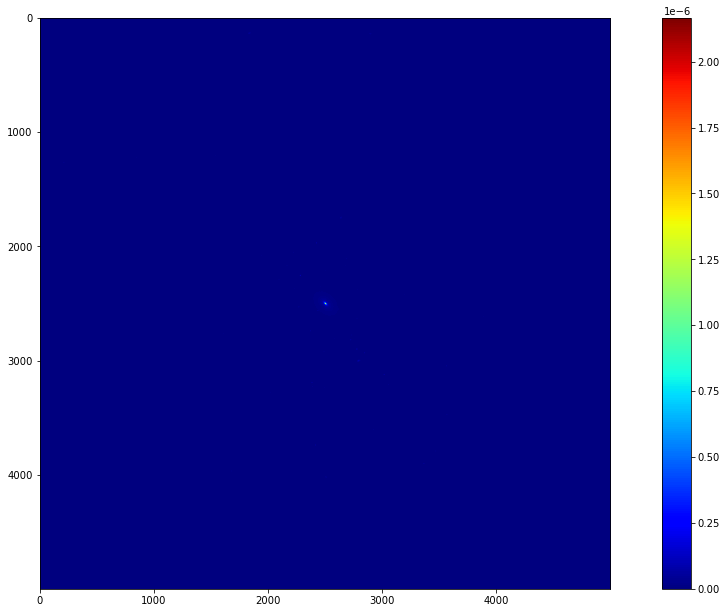

In [19]:
image_in_janskis = transformations.get_image_in_janski(image_data, z = 0.1)
plot_image(image_in_janskis)

In [20]:
z = 0.05
image_data = _fits.getdata(image_file, ext = 0)
image_smaller = transformations.get_downscaled_image_at_z_in_janski(image_data, z, experiment='HSC', use_zoom_func=True)

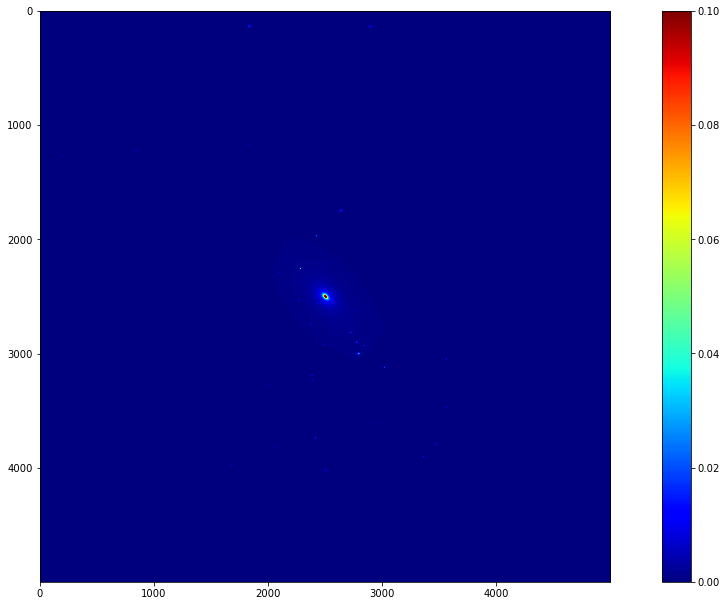

In [26]:
plot_image(image_smaller / np.max(image_smaller), vmax = 0.1)

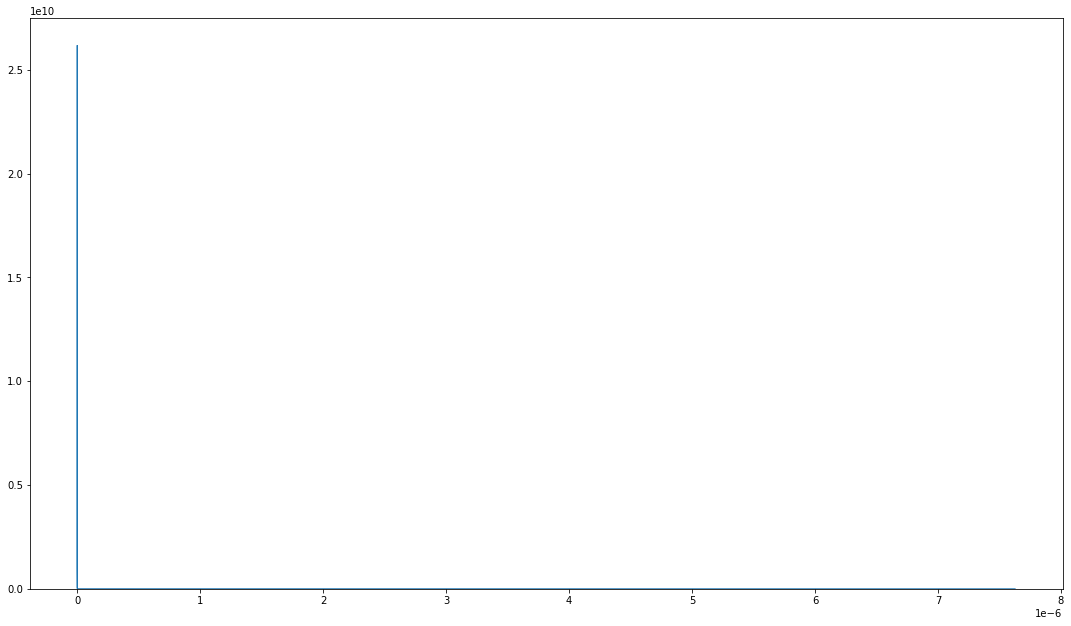

In [22]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
histogram(image_smaller, **hist_kwargs)
# plt.ylim(0,0.5)

In [23]:
image_data = _fits.getdata(image_file, ext = 0)
image_smaller = transformations.get_downscaled_image_at_z_in_janski(image_data, 0.2, experiment='JWST')

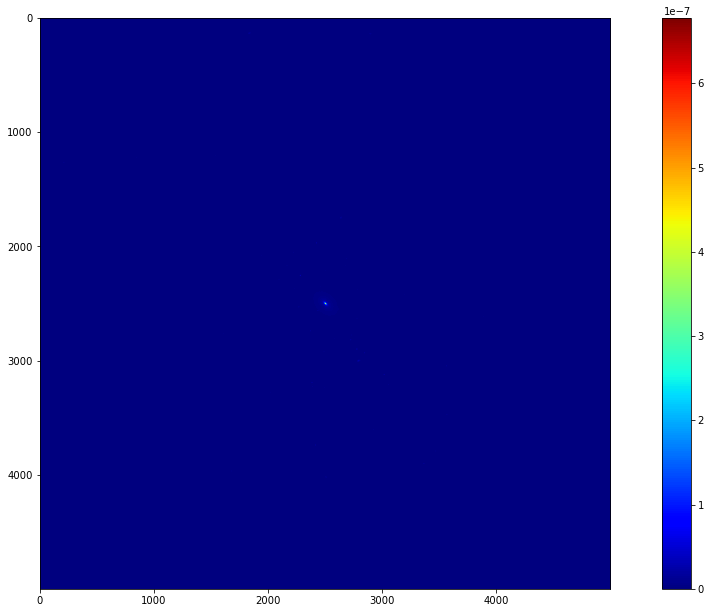

In [24]:
plot_image(image_smaller)